## Import libraries

In [92]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

## Read Data and process NA

In [63]:
df_trainval_raw = pd.read_csv('lab1_train.csv')
df_test_raw = pd.read_csv('lab1_test.csv')

In [77]:
def process_na(data, mean=True):
    return data.fillna(np.mean(data, axis=0)) if mean else data.fillna(0)

## Isolate label and split training set to train/val

In [251]:
def isolate(df_trainval, df_test):
    x_trainval = df_trainval[df_trainval.columns[1:-1]]  # remove ID and label
    y_trainval = df_trainval[df_trainval.columns[-1]]   # select label
    x_test = df_test[df_test.columns[1:]]    # remove ID
    
    x_train, x_val = train_test_split(x_trainval, test_size=0.2, random_state=0)
    y_train, y_val = train_test_split(y_trainval, test_size=0.2, random_state=0)
    
    return x_train, y_train, x_val, y_val, x_test

## Normalize

In [ ]:
def normalize(x_train, x_val, x_test):
    scaler = StandardScaler()
    scaler.fit(data1)
    n = scaler.transform
    return n(x_train), n(x_val), n(x_test)

## Main (NA to 0)

In [253]:
df_trainval = process_na(df_trainval_raw, mean=False)
df_test = process_na(df_test_raw, mean=False)
x_train, y_train, x_val, y_val, x_test = isolate(df_trainval, df_test)
x_train, x_val, x_test = normalize(x_train, x_val, x_test)

clf = GaussianNB()
clf.fit(x_train, y_train) # Train the model
y_pred = clf.predict(x_val) # Predict validation set
acc = accuracy_score(y_val, y_pred)
acc

0.8310991957104558

## Main (NA to mean)

In [254]:
df_trainval = process_na(df_trainval_raw, mean=True)
df_test = process_na(df_test_raw, mean=True)
x_train, y_train, x_val, y_val, x_test = isolate(df_trainval, df_test)
x_train, x_val, x_test = normalize(x_train, x_val, x_test)

clf = GaussianNB()
clf.fit(x_train, y_train) # Train the model
y_pred = clf.predict(x_val) # Predict validation set
acc = accuracy_score(y_val, y_pred)
acc

0.8418230563002681

## PCA

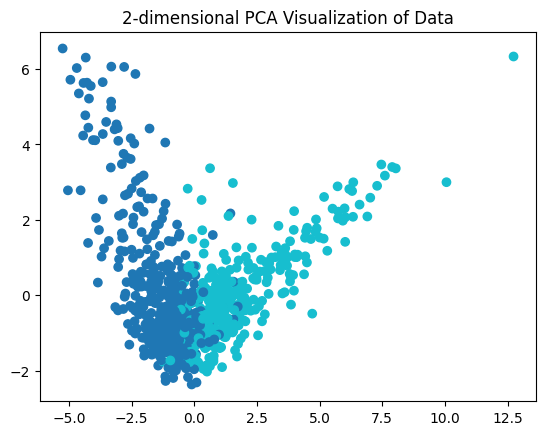

In [255]:
def do_PCA(x):
    return PCA(n_components=2).fit_transform(x)

y_pred = clf.predict(x_test) # Predict test set

fig, ax = plt.subplots()
ax.set_title("2-dimensional PCA Visualization of Data")
ax.scatter(*do_PCA(x_test).swapaxes(0,1), c=y_pred, cmap='tab10')

## For kaggle

In [256]:
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Try different classifiers

In [141]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "Gaussian Process",
]

classifiers = [
    KNeighborsClassifier(6),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
]

## Try different `max_depth` parameters

In [263]:
classifiers = []
names = []
for i in range(1,20):
    names.append(str(i))
    classifiers.append(RandomForestClassifier(n_estimators=100, max_depth=i, random_state=0))

In [264]:
for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train) # Train the model
    y_pred = clf.predict(x_val) # Predict validation set
    acc = accuracy_score(y_val, y_pred)
    print(name, acc)

1 0.8445040214477212
2 0.868632707774799
3 0.8766756032171582
4 0.8793565683646113
5 0.8873994638069705
6 0.8927613941018767
7 0.903485254691689
8 0.903485254691689
9 0.903485254691689
10 0.903485254691689
11 0.903485254691689
12 0.903485254691689
13 0.9061662198391421
14 0.9061662198391421
15 0.903485254691689
16 0.9061662198391421
17 0.9061662198391421
18 0.9061662198391421
19 0.9061662198391421


In [265]:
#clf = KNeighborsClassifier(6, weights="uniform")
clf = RandomForestClassifier(n_estimators=100, max_depth=13, random_state=0)
clf.fit(x_train, y_train) # Train the models
y_pred = clf.predict(x_val) # Predict validation set
acc = accuracy_score(y_val, y_pred)
print(acc)
y_pred = clf.predict(x_test) # Predict testing set
y_pred = pd.concat([df_test.ID, pd.DataFrame(y_pred)], axis = 1)
y_pred.columns = ['ID', 'label']

0.9061662198391421


In [266]:
y_pred.to_csv('submit.csv', index = False)